In [56]:
import pandas as pd
import plotly.express as px

excel_file = 'hLTV _ MM VARIABILITY BY DES GEO (1).xlsx '  # Replace with the path to your Excel file
df = pd.read_excel(excel_file, sheet_name='GEO')
# Create a choropleth map
fig = px.scatter_geo(
    df,
    lat='Latitude',  # Latitude column
    lon='Longitude',  # Longitude column
    color='ROAS',  # Color based on RoAS values
    hover_name='CRM_HIERARCHICAL_GEO_NAME',  # Hover over location name
    projection="natural earth",
    title="Map of Variations of RoAS by Location for Meta Marketing",
    color_continuous_scale='Viridis',  # Customize the color scale
)
#fig.show()
# Save the interactive map to an HTML file
fig.write_html("World_Map_RoAS.html")

Interactive plot saved as 'RoAS_Profit.html'


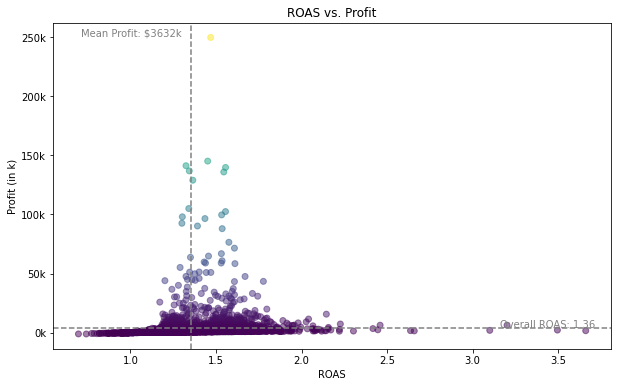

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Load your Excel data into a Pandas DataFrame
excel_file = 'hLTV _ MM VARIABILITY BY DES GEO (1).xlsx'  # Replace with the path to your Excel file
data = pd.read_excel(excel_file, sheet_name='GEO')

# Extract the relevant columns
roas = data['ROAS']
profit = data['PROFIT']

# Create a color map based on Profit values
min_profit = min(profit)
max_profit = max(profit)
cmap = plt.get_cmap('viridis')  # You can choose a different colormap as well
colors = [cmap((p - min_profit) / (max_profit - min_profit)) for p in profit]

# Create a scatter plot with colored dots
plt.figure(figsize=(10, 6))
plt.scatter(roas, profit, c=colors, cmap='viridis', alpha=0.5)  # Alpha controls point transparency

# Add labels and title
plt.xlabel('ROAS')
plt.ylabel('Profit (in k)')
plt.title('ROAS vs. Profit')

# Define a custom formatter to display profit values in thousands
def thousands_formatter(x, pos):
    'The two args are the value and tick position'
    return f'{int(x/1000)}k'

# Apply the custom formatter to the y-axis
formatter = FuncFormatter(thousands_formatter)
plt.gca().get_yaxis().set_major_formatter(formatter)

# Calculate the average Profit and ROAS
average_profit = np.mean(profit)
average_roas = np.mean(roas)

# Add dotted lines for average Profit and ROAS
plt.axhline(average_profit, color='grey', linestyle='--')
plt.axvline(average_roas, color='grey', linestyle='--')

# Calculate the positions for annotation at the ends of each line
max_roas = max(roas)
max_profit = max(profit)

# Manually adjust the positions for annotation at the ends of each line
annotation_x_offset = 2.95
annotation_y_offset = 1000
annotation_xx_offset = -0.50
annotation_yy_offset = 1010

# Annotate the lines with the actual values at the ends of each line
plt.annotate(f'Overall ROAS: {average_roas:.2f}', (max_roas + annotation_xx_offset, average_profit + annotation_yy_offset), color='grey', fontsize=10)
plt.annotate(f'Mean Profit: ${average_profit:.0f}k', (max_roas - annotation_x_offset, max_profit + annotation_y_offset), color='grey', fontsize=10)

# Show the plot
#plt.show()

html_file = "RoAS_Profit.html"
pio.write_html(fig, file=html_file, auto_open=False)

# To display the link to the saved HTML file
print(f"Interactive plot saved as '{html_file}'")


In [76]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go  # Import Plotly graph objects for custom templates

# Load your Excel data into a Pandas DataFrame
excel_file = 'hLTV _ MM VARIABILITY BY DES GEO (1).xlsx'  # Replace with the path to your Excel file
data = pd.read_excel(excel_file, sheet_name='GEO')

# Extract the relevant columns
roas = data['ROAS']
profit = data['PROFIT']

# Calculate the average Profit and ROAS
average_profit = np.mean(profit)
average_roas = np.mean(roas)

# Create a Plotly scatter plot
fig = px.scatter(data, x='ROAS', y='PROFIT', color='PROFIT', color_continuous_scale='Viridis', opacity=0.5,
                labels={'ROAS': 'ROAS', 'PROFIT': 'Profit (in k)'}, title='ROAS vs. Profit')

# Add your custom template
custom_template = go.layout.Template(
    layout=dict(
        paper_bgcolor='white',
        plot_bgcolor='white'
    )
)

#fig.update_layout(template=template)  # Apply the custom template to the figure

# Add dotted lines for average Profit and ROAS
fig.add_shape(type='line', x0=average_roas, x1=average_roas, y0=min(profit), y1=max(profit), line=dict(color='grey', dash='dash'))
fig.add_shape(type='line', x0=min(roas), x1=max(roas), y0=average_profit, y1=average_profit, line=dict(color='grey', dash='dash'))

# Annotate the lines with the actual values at the ends of each line
fig.add_annotation(text=f'Overall ROAS: {average_roas:.2f}', xref='x', yref='y', x=max(roas) + 0.05, y=average_profit + 1000,
                  showarrow=False, font=dict(color='grey', size=10))
fig.add_annotation(text=f'Mean Profit: ${average_profit:.0f}k', xref='x', yref='y', x=max(roas) - 0.3, y=max(profit) + 1000,
                  showarrow=False, font=dict(color='grey', size=10))

fig.show()
# Save the interactive plot as an HTML file
html_file = "RoAS_Profit.html"
pio.write_html(fig, file=html_file, auto_open=False)

# To display the link to the saved HTML file
print(f"Interactive plot saved as '{html_file}'")
#

Interactive plot saved as 'RoAS_Profit.html'


In [78]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go  # Import Plotly graph objects for custom templates

# Load your Excel data into a Pandas DataFrame
excel_file = 'hLTV _ MM VARIABILITY BY DES GEO (1).xlsx'  # Replace with the path to your Excel file
data = pd.read_excel(excel_file, sheet_name='GEO')

# Extract the relevant columns
roas = data['ROAS']
profit = data['PROFIT']

# Calculate the average Profit and ROAS
average_profit = np.mean(profit)
average_roas = np.mean(roas)

# Create a Plotly scatter plot
fig = px.scatter(data, x='ROAS', y='PROFIT', color='PROFIT', color_continuous_scale='Viridis', opacity=0.5,
                labels={'ROAS': 'ROAS', 'PROFIT': 'PROFIT'}, title='ROAS vs. Profit')

# Create a custom template for the layout properties you want to keep
custom_template = go.layout.Template(
    layout=dict(
        paper_bgcolor='white',
        plot_bgcolor='white'
    )
)

# Add shapes and annotations to the figure
fig.add_shape(type='line', x0=average_roas, x1=average_roas, y0=min(profit), y1=max(profit), line=dict(color='grey', dash='dash'))
fig.add_shape(type='line', x0=min(roas), x1=max(roas), y0=average_profit, y1=average_profit, line=dict(color='grey', dash='dash'))
fig.add_annotation(text=f'Overall ROAS: {average_roas:.2f}', xref='x', yref='y', x=max(roas) + 0.05, y=average_profit + 1000,
                  showarrow=False, font=dict(color='grey', size=10))
fig.add_annotation(text=f'Mean Profit: ${average_profit:.0f}k', xref='x', yref='y', x=max(roas) - 0.3, y=max(profit) + 1000,
                  showarrow=False, font=dict(color='grey', size=10))

# Apply the custom template to the figure
fig.update_layout(template=custom_template)

fig.show()
# Save the interactive plot as an HTML file
html_file = "RoAS_Profit.html"
pio.write_html(fig, file=html_file, auto_open=False)

# To display the link to the saved HTML file
print(f"Interactive plot saved as '{html_file}'")
#

Interactive plot saved as 'RoAS_Profit.html'


In [79]:
import pandas as pd
import plotly.express as px

# Load your Excel data into a Pandas DataFrame
excel_file = 'hLTV _ MM VARIABILITY BY DES GEO (3).xlsx'  # Replace with the path to your Excel file
data = pd.read_excel(excel_file, sheet_name='GEO-DS')

# Extract the relevant columns
roas = data['REVENUE']
profit = data['std']

# Define a custom color scale starting with a slightly darker color and becoming brighter
custom_color_scale = ['#154360', '#1F77B4', '#7FB7DB', '#33A02C', '#FB9A99']

# Create a scatter plot using Plotly Express and specify the custom color scale
fig = px.scatter(data, x=roas, y=profit, color=profit, color_continuous_scale=custom_color_scale, title='Revenue vs. Deviation of Revenue')
fig.update_layout(xaxis_title='REVENUE', yaxis_title='Deviation of Revenue')
fig.update_layout(template=template)

# Define a custom y-axis label formatter function to display profit values in thousands
def thousands_formatter(x):
    return f'{int(x/1000)}'

# Apply the custom formatter to the y-axis
fig.update_layout(yaxis_tickformat='~s', yaxis_ticksuffix='', yaxis_fixedrange=True)

# Set the plot background color to white
fig.update_layout(plot_bgcolor='white')

# Show the plot
fig.show()

# Save the interactive plot as an HTML file
html_file = "Rev_vs_STD.html"
pio.write_html(fig, file=html_file, auto_open=False)

# To display the link to the saved HTML file
print(f"Interactive plot saved as '{html_file}'")


Interactive plot saved as 'Rev_vs_STD.html'


In [80]:
import pandas as pd
import plotly.express as px

# Load your Excel data into a Pandas DataFrame
excel_file = 'hLTV _ MM VARIABILITY BY DES GEO (3).xlsx'
data = pd.read_excel(excel_file, sheet_name='GEO-DS')

# Specify the columns to be melted, which are the monthly revenue columns
monthly_revenue_columns = ['REVENUE_JAN', 'REVENUE_FEB', 'REVENUE_MAR', 'REVENUE_APR', 'REVENUE_MAY', 'REVENUE_JUN', 'REVENUE_JUL', 'REVENUE_AUG', 'REVENUE_SEP','REVENUE_OCT','REVENUE_NOV','REVENUE_DEC','REVENUE_JAN_23','REVENUE_FEB_23','REVENUE_MAR_23']

# Melt the data to create a "Month" and "Revenue" column
data = data.melt(id_vars=['ENTRY_GEO_LOCATION', 'USERS', 'VISITS', 'REVENUE'], value_vars=monthly_revenue_columns, var_name='Month', value_name='Revenue')

# Create the box plot
fig = px.box(data, x="Month", y="Revenue", hover_data=['ENTRY_GEO_LOCATION'], title='Revenue | Monthly Trend')
fig.update_layout(xaxis=dict(title='MONTH'))
fig.update_layout(yaxis=dict(title='REVENUE'))
fig.update_layout(
    font_family="Poppins",
    font_color="Black",
    title_font_family="Poppins",
    title_font_color="black",
    legend_title_font_color="black"
)
fig.update_xaxes(gridcolor='#cbedef', showgrid=True, gridwidth=0.5,tickfont=dict(size=10))
fig.update_yaxes(gridcolor='#cbedef', showgrid=True, gridwidth=0.5,tickfont=dict(size=10))
fig.update_layout(template='simple_white', font=dict(size=18))
fig.show()
# Save the interactive plot as an HTML file
html_file = "Rev_MonthlyTrend.html"
pio.write_html(fig, file=html_file, auto_open=False)

# To display the link to the saved HTML file
print(f"Interactive plot saved as '{html_file}'")



Interactive plot saved as 'Rev_MonthlyTrend.html'


In [81]:
import plotly.express as px
# Load your Excel data into a Pandas DataFrame
excel_file = 'hLTV _ MM VARIABILITY BY DES GEO (3).xlsx'  # Replace with the path to your Excel file
data = pd.read_excel(excel_file, sheet_name='GEO-DS')



fig = px.scatter(data, x="REVENUE", y="std" , color="HIERARCHICAL_PLACETYPE_NAME")
template = "simple_white"
fig.update_layout(template=template)
fig.show()
# Save the interactive plot as an HTML file
html_file = "Rev_Hierarchical.html"
pio.write_html(fig, file=html_file, auto_open=False)

# To display the link to the saved HTML file
print(f"Interactive plot saved as '{html_file}'")


Interactive plot saved as 'Rev_Hierarchical.html'


In [47]:
import plotly.express as px
import plotly.io as pio
import pandas as pd

# Load your Excel data into a Pandas DataFrame
excel_file = 'hLTV _ MM VARIABILITY BY DES GEO (3).xlsx'  # Replace with the path to your Excel file
data = pd.read_excel(excel_file, sheet_name='GEO-DS')

fig = px.scatter(data, x="REVENUE", y="std", color="HIERARCHICAL_PLACETYPE_NAME")
template = "simple_white"
fig.update_layout(template=template)

# Use the pio.write_html function to save the interactive plot as an HTML file
# You can change the file name and path as needed
html_file = "interactive_plot.html"
pio.write_html(fig, file=html_file, auto_open=False)

# To display the link to the saved HTML file
print(f"Interactive plot saved as '{html_file}'")

# You can also open the HTML file in a web browser to interact with the plot


Interactive plot saved as 'interactive_plot.html'
